# Aplicar PCA para reducir la dimensión de los datos en tareas de aprendizaje automático.





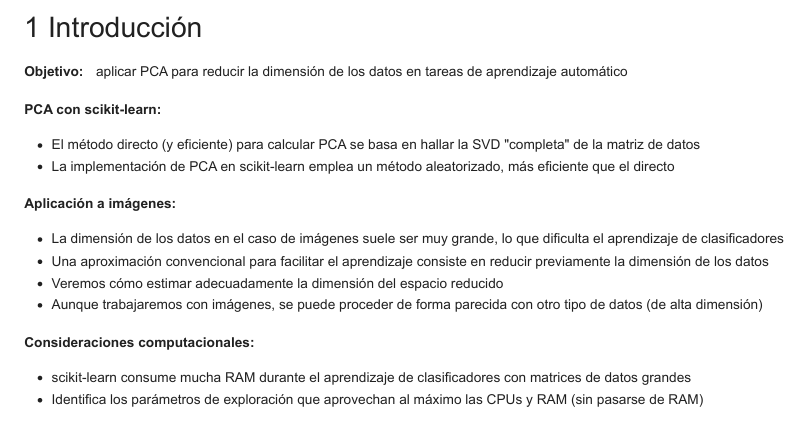

***Scikit-learn es una biblioteca de machine learning para Python que proporciona herramientas eficientes para el aprendizaje automático y la minería de datos. Se basa en otras bibliotecas como NumPy, SciPy y Matplotlib.***

----------------------------------------------------------------------------------------------------------------------------------------------------------------

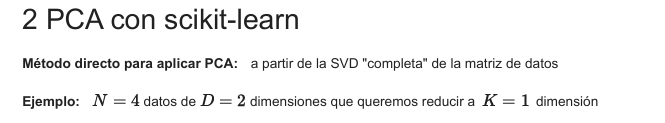

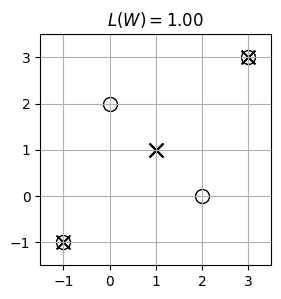

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[-1, -1], [0, 2], [2, 0], [3, 3]])
N = len(X)
K = 1
X_centered = X - X.mean(axis=0)
_, _, Vt = np.linalg.svd(X_centered)
W = Vt[:K, :].T
Z = X @ W
hX = Z @ W.T
L = np.square(X - hX).sum(axis=1).mean()
fig, ax = plt.subplots(figsize=(3, 3))
ax.set_aspect("equal")
plt.axis([-1.5, 3.5, -1.5, 3.5])
plt.grid(True)
ax.set_title(f'$L(W)={L:.2f}$')
plt.scatter(*X.T, facecolor='white', edgecolor='k', s=100)
plt.scatter(*hX.T, facecolor='black', s=100, marker='x')
plt.show()

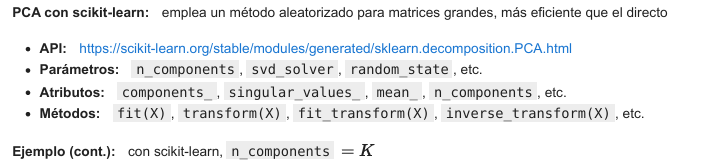

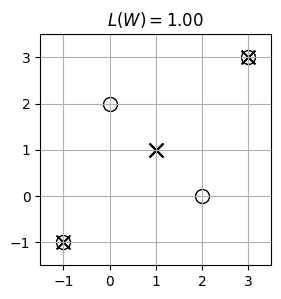

In [ ]:
import numpy as np;
import matplotlib.pyplot as plt;
from sklearn.decomposition import PCA

X = np.array([[-1, -1], [0, 2], [2, 0], [3, 3]])
N = len(X)
K = 1
pca = PCA(n_components=K).fit(X - X.mean(0))
Z = pca.transform(X)
hX = pca.inverse_transform(Z)
L = np.square(X - hX).sum(axis=1).mean()
fig, ax = plt.subplots(figsize=(3, 3))
ax.set_aspect("equal")
plt.axis([-1.5, 3.5, -1.5, 3.5])
plt.grid(True)
ax.set_title(f'$L(W)={L:.2f}$')
plt.scatter(*X.T, facecolor='white', edgecolor='k', s=100)
plt.scatter(*hX.T, facecolor='black', s=100, marker='x')
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------

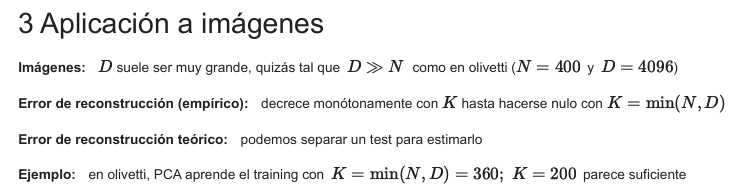

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

X, y = fetch_olivetti_faces(return_X_y=True)
X = X.astype(np.float32)
test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=23)

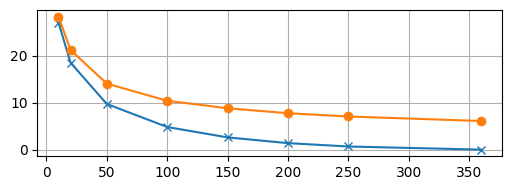

In [ ]:
import numpy as np; import matplotlib.pyplot as plt; from sklearn.decomposition import PCA

max_K = np.min(X_train.shape)
pca = PCA(n_components=max_K).fit(X_train)
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)
Ks = np.array([10, 20, 50, 100, 150, 200, 250, max_K])
L_train = np.empty_like(Ks, dtype=float)
L_test = np.empty_like(Ks, dtype=float)

for i, K in enumerate(Ks):
    Z_train_K = Z_train.copy()
    Z_train_K[:, K:] = 0.0
    hX_train = pca.inverse_transform(Z_train_K)
    L_train[i] = np.square(X_train - hX_train).sum(axis=1).mean()

    Z_test_K = Z_test.copy()
    Z_test_K[:, K:] = 0.0
    hX_test = pca.inverse_transform(Z_test_K)
    L_test[i] = np.square(X_test - hX_test).sum(axis=1).mean()

plt.figure(figsize=(6, 1.9))
plt.grid(True)
plt.plot(Ks, L_train, '-x', Ks, L_test, '-o')
plt.show()

Se aplica PCA a las imágenes de Olivetti Faces para reducir la dimensión y evaluar la reconstrucción con diferentes valores de 𝐾. La reconstrucción es más precisa con valores altos de 𝐾, y el error cae a 0 cuando 𝐾 =360 porque se conservan todas las componentes principales, lo que permite una reconstrucción perfecta.

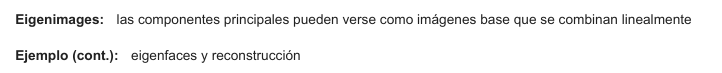

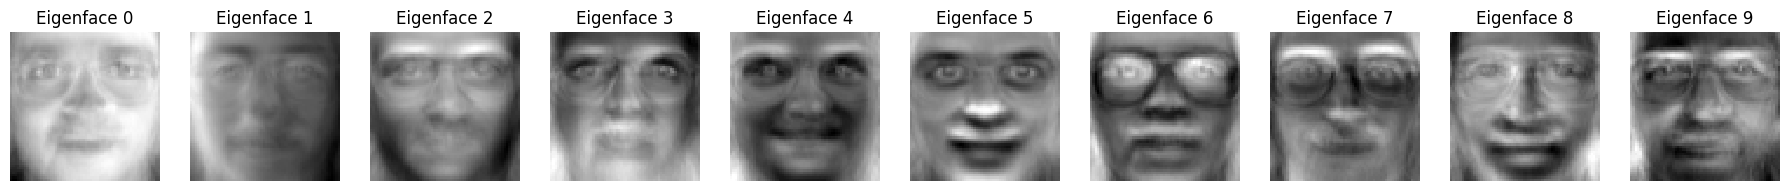

In [ ]:
K = 200;
pca = PCA(n_components=K).fit(X_train);
nrows, ncols = 1, 10
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18*nrows/ncols), constrained_layout=True)
for i in range(min(K, nrows * ncols)):
  ax = axs.flat[i]; ax.set_axis_off()
  ax.set_title(f"Eigenface {i}")
  ax.imshow(pca.components_[i, :].reshape((64, 64)), cmap=plt.cm.gray, interpolation="none")

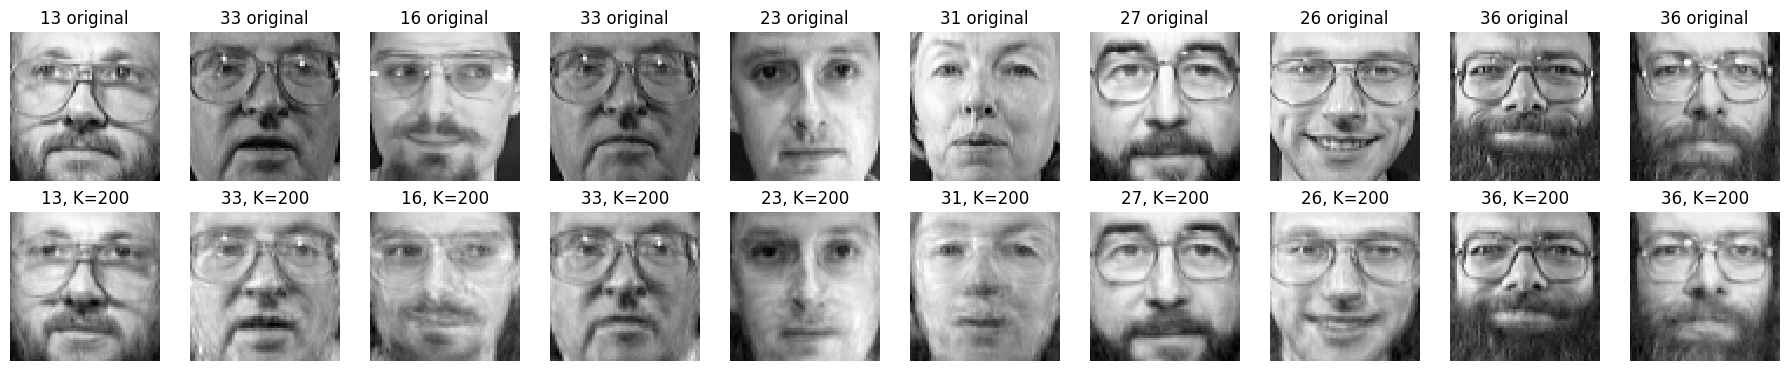

In [ ]:
ncols = 10;
Z_test = pca.transform(X_test[:ncols])
hX_test = pca.inverse_transform(Z_test)
fig, axs = plt.subplots(nrows=2, ncols=10, figsize=(18, 18*2/ncols), constrained_layout=True)
for i in range(ncols):
  ax = axs.flat[i]
  ax.set_axis_off()
  ax.set_title(f"{y_test[i]} original")
  ax.imshow(X_test[i, :].reshape((64, 64)), cmap=plt.cm.gray, interpolation="none")
  ax = axs.flat[ncols + i]
  ax.set_axis_off()
  ax.set_title(f"{y_test[i]}, K={K}")
  ax.imshow(hX_test[i, :].reshape((64, 64)), cmap=plt.cm.gray, interpolation="none")

Este código aplica PCA a las imágenes de Olivetti Faces para obtener las "eigenfaces" (componentes principales) y visualizar algunas de ellas. Primero, se muestra un conjunto de eigenfaces, que son las imágenes base que se combinan linealmente para reconstruir las caras. Luego, para un conjunto de imágenes de prueba, se proyectan y reconstruyen utilizando las primeras 𝐾 componentes principales, comparando las imágenes originales con las reconstruidas para mostrar cómo el PCA logra aproximar las imágenes de manera efectiva.

**Las componentes principales son las direcciones en las que los datos tienen la mayor varianza, es decir, son las características o combinaciones lineales de las variables originales que mejor capturan la variabilidad de los datos. En el contexto de PCA (Análisis de Componentes Principales), se buscan estas direcciones para reducir la dimensionalidad de los datos manteniendo la mayor cantidad posible de información.**

------------------------------------------------------------------------------------------------------------

# **EJEMPLO CON DIGITS**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
X, y = load_digits(return_X_y=True)
X = X.astype(np.float32) / 16.0; test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=23)

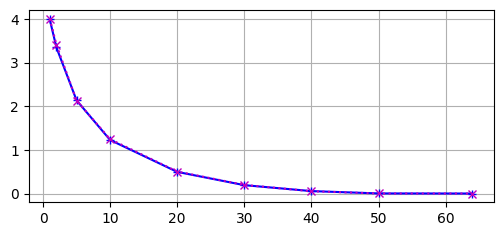

In [ ]:
max_K = np.min(X_train.shape)
pca = PCA(n_components=max_K).fit(X_train)
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)
Ks = np.array([1, 2, 5, 10, 20, 30, 40, 50, max_K])
L_train = np.empty_like(Ks, dtype=float)
L_test = np.empty_like(Ks, dtype=float)
for i, K in enumerate(Ks):
  Z_train_K = Z_train.copy()
  Z_train_K[:, K:] = 0.0
  hX_train = pca.inverse_transform(Z_train_K)
  L_train[i] = np.square(X_train - hX_train).sum(axis=1).mean()
  Z_test_K = Z_test.copy()
  Z_test_K[:, K:] = 0.0
  hX_test = pca.inverse_transform(Z_test_K)
  L_test[i] = np.square(X_test - hX_test).sum(axis=1).mean()
plt.figure(figsize=(6, 2.5))
plt.grid(True); plt.plot(Ks, L_train, '+-b', Ks, L_test, 'x:m')

Se puede ver en el gráfico que una K = 30 +- puede servir para la reconstrucción.

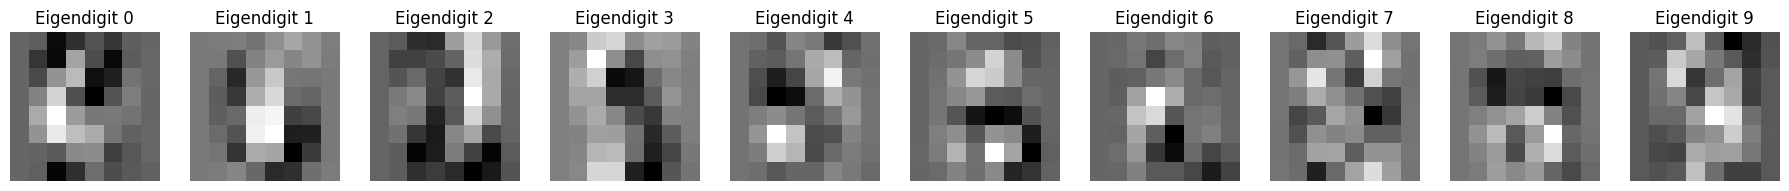

In [ ]:
K = 30
pca = PCA(n_components=K).fit(X_train)
nrows, ncols = 1, 10
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18*nrows/ncols), constrained_layout=True)
for i in range(min(K, nrows * ncols)):
  ax = axs.flat[i]; ax.set_axis_off()
  ax.set_title(f"Eigendigit {i}")
  ax.imshow(pca.components_[i, :].reshape((8, 8)), cmap=plt.cm.gray, interpolation="none")

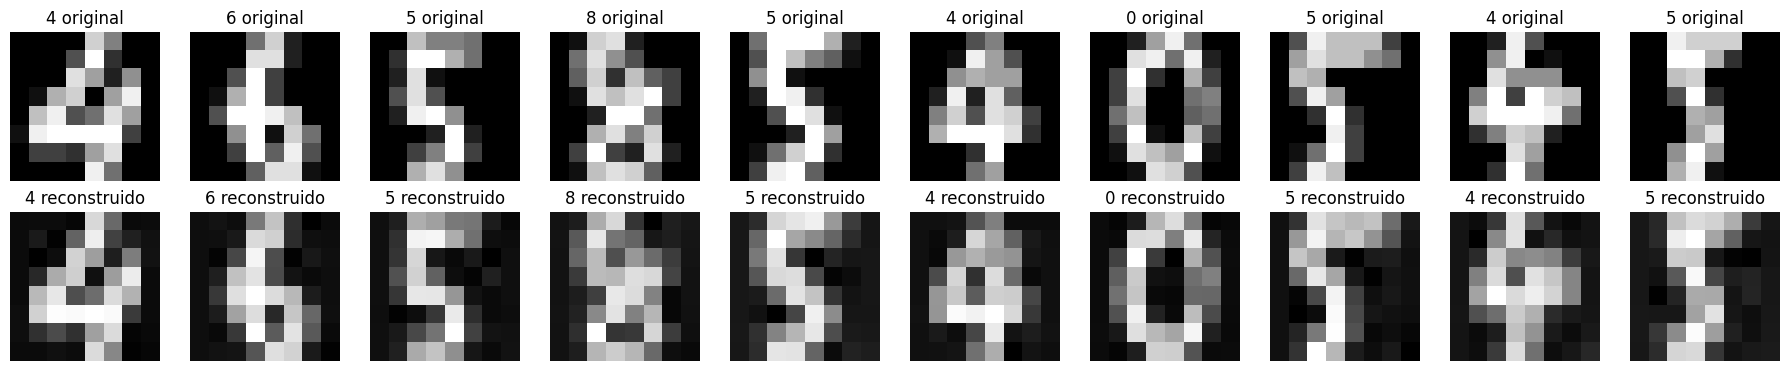

In [ ]:
ncols = 10
Z_test = pca.transform(X_test[:ncols])
hX_test = pca.inverse_transform(Z_test)
fig, axs = plt.subplots(nrows=2, ncols=10, figsize=(18, 18*2/ncols), constrained_layout=True)
for i in range(ncols):
  ax = axs.flat[i]
  ax.set_axis_off()
  ax.set_title(f"{y_test[i]} original")
  ax.imshow(X_test[i, :].reshape((8, 8)), cmap=plt.cm.gray, interpolation="none")
  ax = axs.flat[ncols + i]
  ax.set_axis_off(); ax.set_title(f"{y_test[i]} reconstruido")
  ax.imshow(hX_test[i, :].reshape((8, 8)), cmap=plt.cm.gray, interpolation="none")

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# **EJEMPLO CON MNIST DE OPENML**

In [ ]:
import warnings; warnings.filterwarnings("ignore"); import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
X, y = fetch_openml(data_id=554, return_X_y=True, as_frame=False, parser='liac-arff')
X /= 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, shuffle=False)

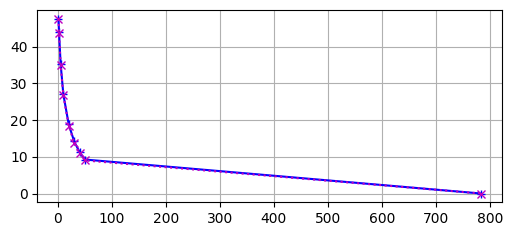

In [ ]:
max_K = np.min(X_train.shape)
pca = PCA(n_components=max_K).fit(X_train)
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)
Ks = np.array([1, 2, 5, 10, 20, 30, 40, 50, max_K])
L_train = np.empty_like(Ks, dtype=float)
L_test = np.empty_like(Ks, dtype=float)
for i, K in enumerate(Ks):
  Z_train_K = Z_train.copy()
  Z_train_K[:, K:] = 0.0; hX_train = pca.inverse_transform(Z_train_K)
  L_train[i] = np.square(X_train - hX_train).sum(axis=1).mean()
  Z_test_K = Z_test.copy()
  Z_test_K[:, K:] = 0.0
  hX_test = pca.inverse_transform(Z_test_K)
  L_test[i] = np.square(X_test - hX_test).sum(axis=1).mean()
plt.figure(figsize=(6, 2.5)); plt.grid(True)
plt.plot(Ks, L_train, '+-b', Ks, L_test, 'x:m');

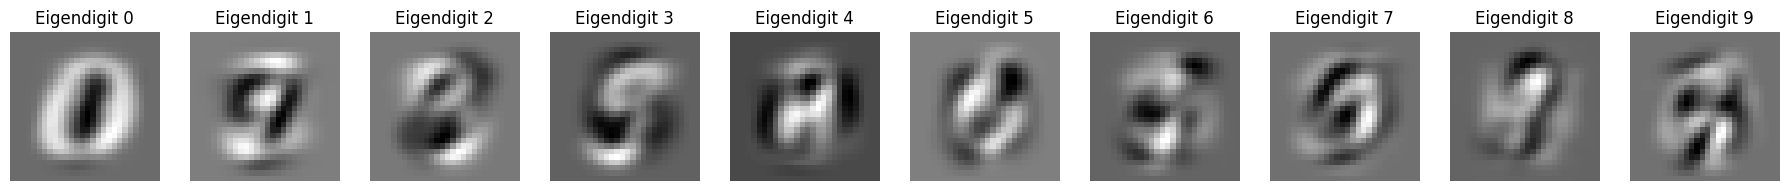

In [ ]:
K = 25; pca = PCA(n_components=K).fit(X_train)
nrows, ncols = 1, 10
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18*nrows/ncols), constrained_layout=True)
for i in range(min(K, nrows * ncols)):
  ax = axs.flat[i]; ax.set_axis_off()
  ax.set_title(f"Eigendigit {i}")
  ax.imshow(pca.components_[i, :].reshape((28, 28)), cmap=plt.cm.gray, interpolation="none")

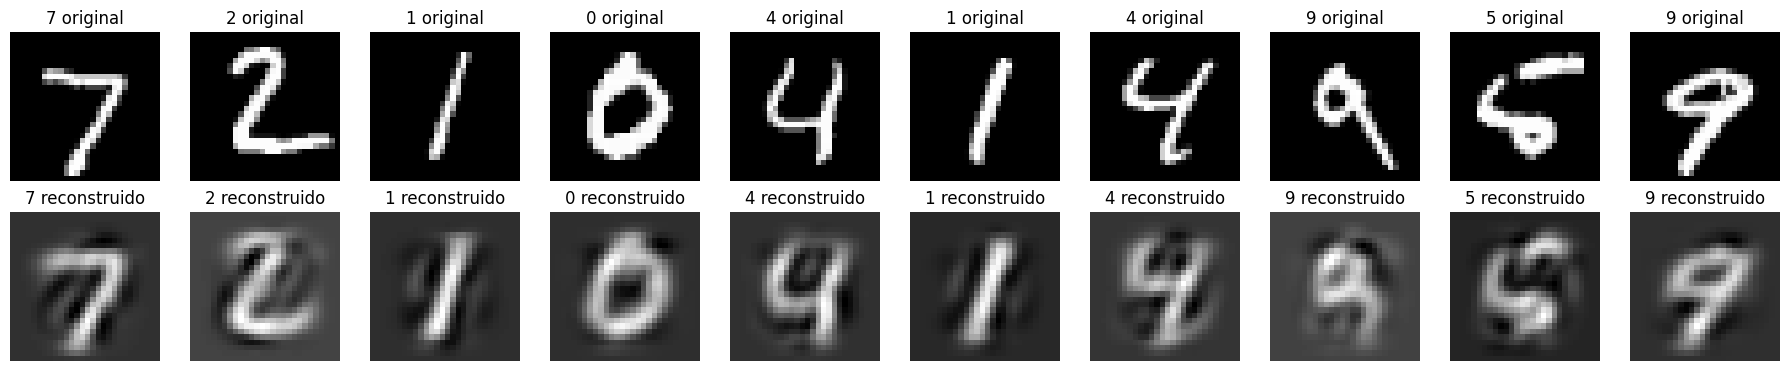

In [ ]:
ncols = 10
Z_test = pca.transform(X_test[:ncols])
hX_test = pca.inverse_transform(Z_test)
fig, axs = plt.subplots(nrows=2, ncols=10, figsize=(18, 18*2/ncols), constrained_layout=True)
for i in range(ncols):
  ax = axs.flat[i]
  ax.set_axis_off()
  ax.set_title(f"{y_test[i]} original")
  ax.imshow(X_test[i, :].reshape((28, 28)), cmap=plt.cm.gray, interpolation="none")
  ax = axs.flat[ncols + i]
  ax.set_axis_off()
  ax.set_title(f"{y_test[i]} reconstruido")
  ax.imshow(hX_test[i, :].reshape((28, 28)), cmap=plt.cm.gray, interpolation="none")

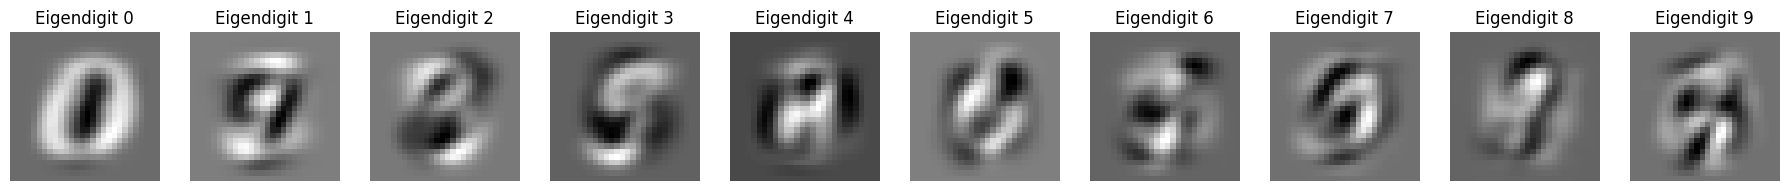

In [ ]:
K = 450
pca = PCA(n_components=K).fit(X_train)
nrows, ncols = 1, 10
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18*nrows/ncols), constrained_layout=True)
for i in range(min(K, nrows * ncols)):
  ax = axs.flat[i]
  ax.set_axis_off()
  ax.set_title(f"Eigendigit {i}")
  ax.imshow(pca.components_[i, :].reshape((28, 28)), cmap=plt.cm.gray, interpolation="none")

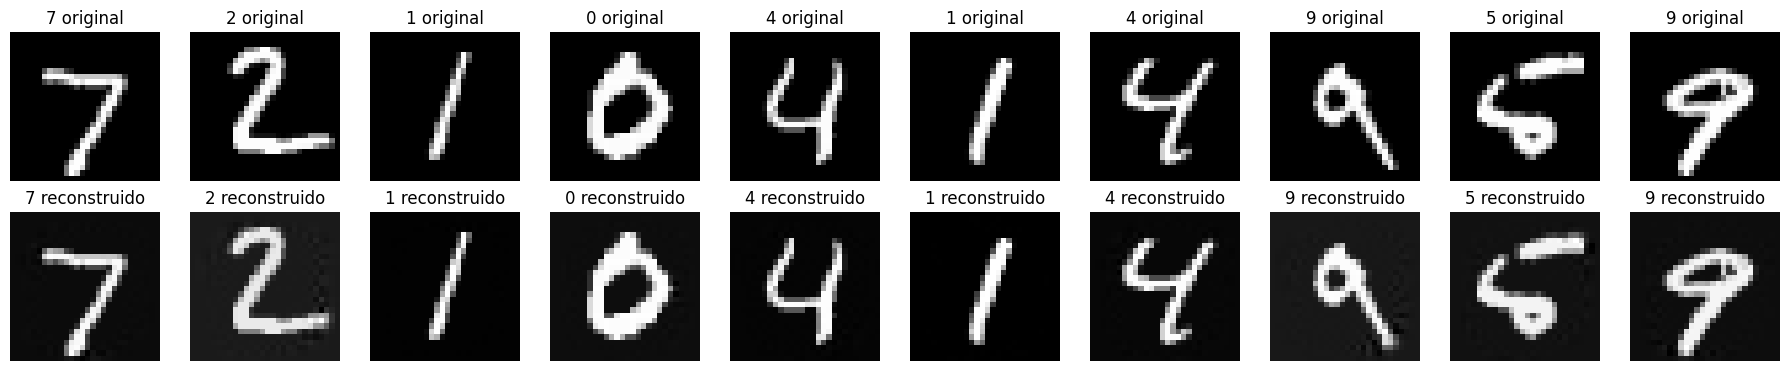

In [ ]:
ncols = 10; Z_test = pca.transform(X_test[:ncols])
hX_test = pca.inverse_transform(Z_test)
fig, axs = plt.subplots(nrows=2, ncols=10, figsize=(18, 18*2/ncols), constrained_layout=True)
for i in range(ncols):
  ax = axs.flat[i]
  ax.set_axis_off()
  ax.set_title(f"{y_test[i]} original")
  ax.imshow(X_test[i, :].reshape((28, 28)), cmap=plt.cm.gray, interpolation="none")
  ax = axs.flat[ncols + i]
  ax.set_axis_off()
  ax.set_title(f"{y_test[i]} reconstruido")
  ax.imshow(hX_test[i, :].reshape((28, 28)), cmap=plt.cm.gray, interpolation="none")

Podemos observar que conforme subimos el valor de K la reconstrucción mejora notablemente, la clave es escontrar el punto medio entre eficiencia para el modelo y reconstrucción precisa para las imágenes.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# **EJEMPLO CON Fashion-MNIST DE OPENML**

In [ ]:
import warnings; warnings.filterwarnings("ignore"); import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
X, y = fetch_openml(data_id=40996, return_X_y=True, as_frame=False, parser='liac-arff')
X /= 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, shuffle=False)

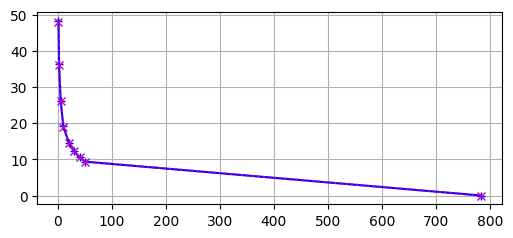

In [ ]:
max_K = np.min(X_train.shape)
pca = PCA(n_components=max_K).fit(X_train)
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)
Ks = np.array([1, 2, 5, 10, 20, 30, 40, 50, max_K])
L_train = np.empty_like(Ks, dtype=float)
L_test = np.empty_like(Ks, dtype=float)
for i, K in enumerate(Ks):
  Z_train_K = Z_train.copy()
  Z_train_K[:, K:] = 0.0; hX_train = pca.inverse_transform(Z_train_K)
  L_train[i] = np.square(X_train - hX_train).sum(axis=1).mean()
  Z_test_K = Z_test.copy()
  Z_test_K[:, K:] = 0.0
  hX_test = pca.inverse_transform(Z_test_K)
  L_test[i] = np.square(X_test - hX_test).sum(axis=1).mean()
plt.figure(figsize=(6, 2.5)); plt.grid(True)
plt.plot(Ks, L_train, '+-b', Ks, L_test, 'x:m');

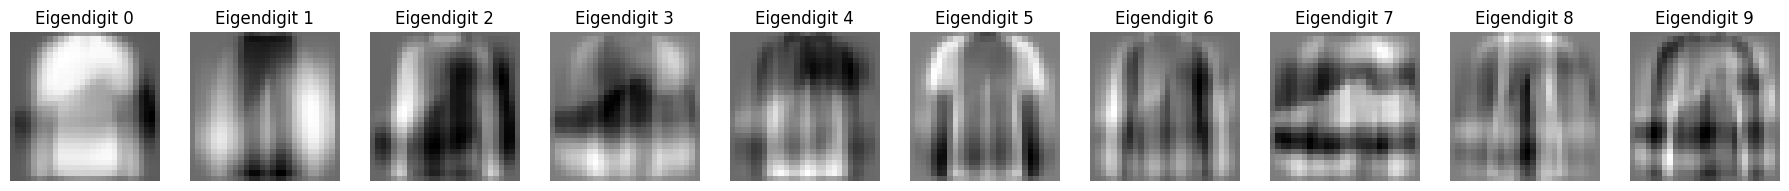

In [ ]:
K = 25; pca = PCA(n_components=K).fit(X_train)
nrows, ncols = 1, 10
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18*nrows/ncols), constrained_layout=True)
for i in range(min(K, nrows * ncols)):
  ax = axs.flat[i]; ax.set_axis_off()
  ax.set_title(f"Eigendigit {i}")
  ax.imshow(pca.components_[i, :].reshape((28, 28)), cmap=plt.cm.gray, interpolation="none")

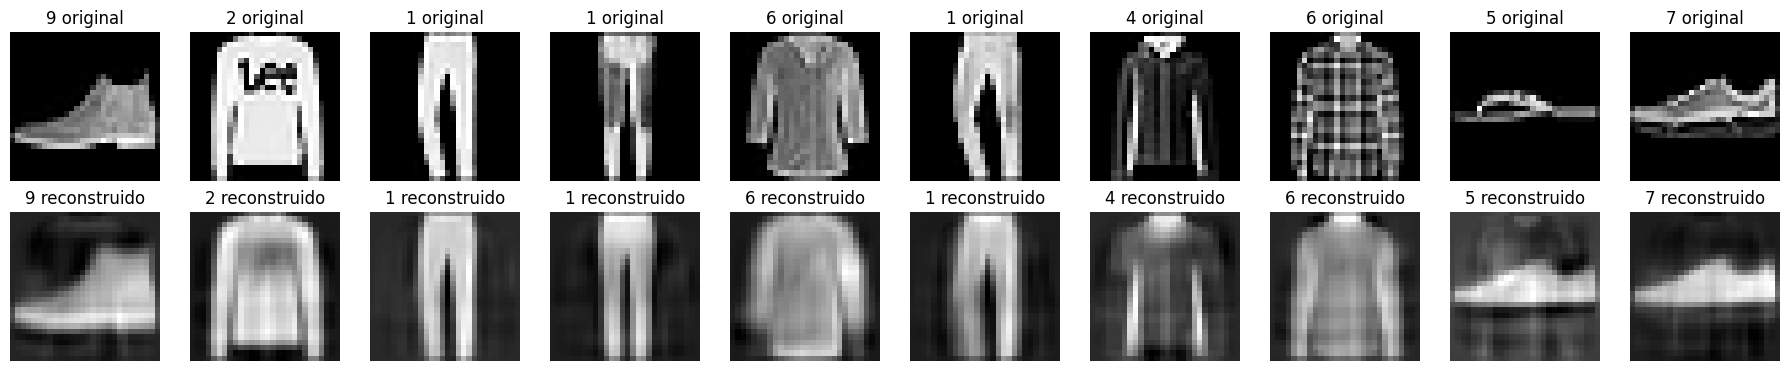

In [ ]:
ncols = 10
Z_test = pca.transform(X_test[:ncols])
hX_test = pca.inverse_transform(Z_test)
fig, axs = plt.subplots(nrows=2, ncols=10, figsize=(18, 18*2/ncols), constrained_layout=True)
for i in range(ncols):
  ax = axs.flat[i]
  ax.set_axis_off()
  ax.set_title(f"{y_test[i]} original")
  ax.imshow(X_test[i, :].reshape((28, 28)), cmap=plt.cm.gray, interpolation="none")
  ax = axs.flat[ncols + i]
  ax.set_axis_off()
  ax.set_title(f"{y_test[i]} reconstruido")
  ax.imshow(hX_test[i, :].reshape((28, 28)), cmap=plt.cm.gray, interpolation="none")

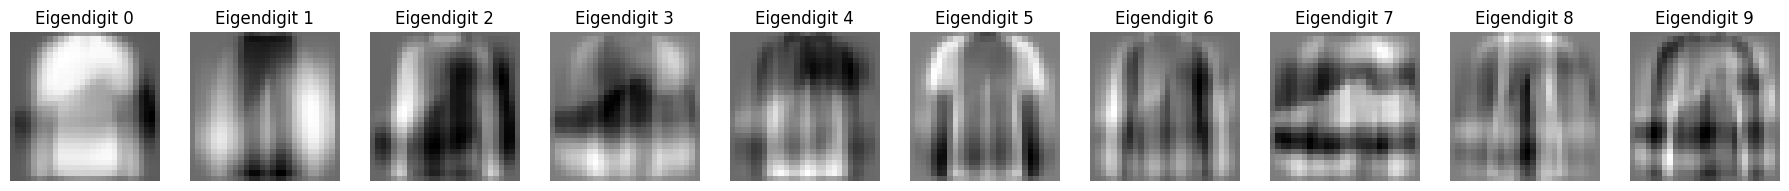

In [ ]:
K = 450; pca = PCA(n_components=K).fit(X_train)
nrows, ncols = 1, 10
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 18*nrows/ncols), constrained_layout=True)
for i in range(min(K, nrows * ncols)):
  ax = axs.flat[i]; ax.set_axis_off()
  ax.set_title(f"Eigendigit {i}")
  ax.imshow(pca.components_[i, :].reshape((28, 28)), cmap=plt.cm.gray, interpolation="none")

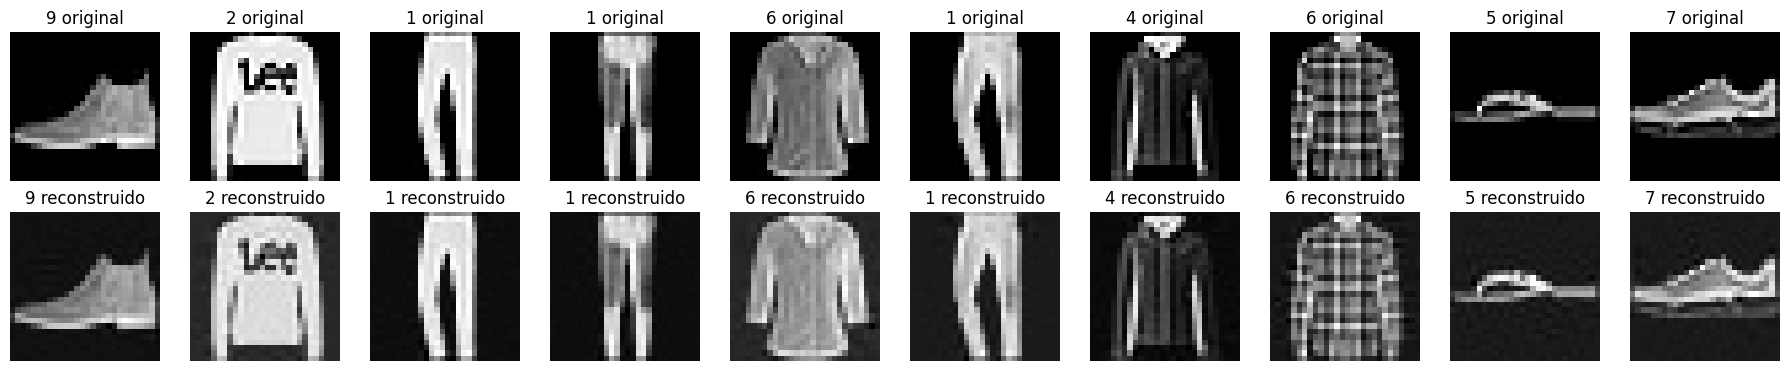

In [ ]:
ncols = 10
Z_test = pca.transform(X_test[:ncols])
hX_test = pca.inverse_transform(Z_test)
fig, axs = plt.subplots(nrows=2, ncols=10, figsize=(18, 18*2/ncols), constrained_layout=True)
for i in range(ncols):
  ax = axs.flat[i]
  ax.set_axis_off()
  ax.set_title(f"{y_test[i]} original")
  ax.imshow(X_test[i, :].reshape((28, 28)), cmap=plt.cm.gray, interpolation="none")
  ax = axs.flat[ncols + i]
  ax.set_axis_off()
  ax.set_title(f"{y_test[i]} reconstruido")
  ax.imshow(hX_test[i, :].reshape((28, 28)), cmap=plt.cm.gray, interpolation="none")